<h1>TAREA 10</h1>
<h2>Sergio Alejandro Diaz Pinilla</h2>
<h2>Julian Camilo Mendez Corredor</h2>
<br>
<br>
<h2>Punto 1</h2>

<li>Implementar,comounafunciónenpython,losmomentos de Flusser y Suk, y compararlos contra los momentos de Hu, como descriptores de imágenes.
</li>


<h1 style="font-size:100%; background-color:rgba(70, 0, 700, 0.2); color:black; text-align:center; line-height : 30px;">
Visión de Máquina &#8212; F. Prieto </h1>


Hu
[[  2.35660755e-01]
 [  9.44846344e-03]
 [  1.01671826e-02]
 [  3.95414470e-04]
 [  2.29895443e-07]
 [ -1.02486904e-06]
 [  7.58765318e-07]]
flusser
[0.011521881986691133, -1.259690627511421e-06, -0.00012067939588943609, 5.060875516588194e-06]


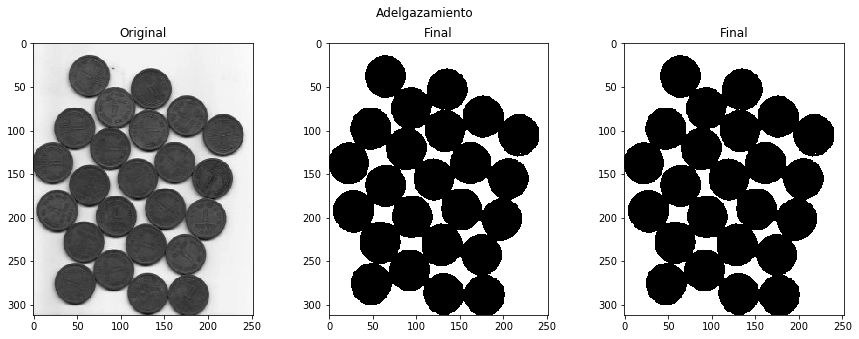

In [36]:
import numpy as np
import cv2
from __future__ import division
import matplotlib.pyplot as plt

def Flusser (M):
    F =[]
    F.append( ((M['mu20'] * M['mu02']) - (M['mu11'])**2)/M['m00']**4)

    F.append( ((M['mu30']**2 * M['mu03']**2) 
           - (6*M['mu30']*M['mu21']*M['mu12']*M['mu03'])
            + (4*M['mu30']*M['mu12']**3) 
            + (4*M['mu03']*M['mu21']**3) 
            - (3*M['mu21']**2 *M['mu12']**2)) 
    / (M['m00']**10)
            )

    F.append( (M['mu20']*(M['mu21'] * M['mu03'] - M['mu12']**2) 
           - M['mu11']*(M['mu30'] * M['mu03'] - M['mu12']*M['mu21'])
           + M['mu02']*(M['mu30'] * M['mu12'] - M['mu21']**2))
    / (M['m00']**7)
            )

    F.append( ((M['mu20']**3 * M['mu03']**2) 
           - (6*M['mu20']**2 *M['mu11']*M['mu12']*M['mu03'])
               - (6*M['mu20']**2 *M['mu02']*M['mu21']*M['mu03'])
               + (9*M['mu20']**2 *M['mu02']*M['mu12']**2)
               + (12*M['mu20'] *M['mu11']**2 *M['mu21']*M['mu03'])
               + (6*M['mu20'] *M['mu11']*M['mu02']*M['mu30']*M['mu03'])
               - (18*M['mu20'] *M['mu11']*M['mu02']*M['mu21']*M['mu12'])
               - (8*M['mu11']**3 *M['mu30']*M['mu03'])
               - (6*M['mu20'] *M['mu02']** 2 *M['mu30']*M['mu12'])
               + (9*M['mu20'] *M['mu02']**2 *M['mu21'])
               + (12*M['mu11']**2 *M['mu02']*M['mu30']*M['mu12'])
               - (6*M['mu11'] *M['mu02']**2 *M['mu30']*M['mu21'])
               + (M['mu02']**3 * M['mu30']**2)) 
    / (M['m00']**11)
        )
    return F

img = cv2.imread('w.jpg',0)
ret, thresh=cv2.threshold(img,127,255,0)
im2,contours, hierarchy=cv2.findContours(thresh,1,2)
cnt= contours[0]
M=cv2.moments(cnt)
F=Flusser(M)
Hu=cv2.HuMoments(M)
print 'Hu'
print Hu
print 'flusser'
print F
plt.figure(1,figsize=(15,5))
plt.suptitle("Adelgazamiento")
plt.subplot(131), plt.imshow(img, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(132), plt.imshow(thresh, cmap=plt.cm.gray), plt.title('Final')
plt.subplot(133), plt.imshow(im2, cmap=plt.cm.gray), plt.title('Final')
plt.show()

<h2>Punto 2</h2>

<p>Implementar,como una función en python,alguno de los siguientes momentos ortogonales para imágenes:</p>
  <li>Momentos de Legendre.</li>
  <li>Momentos de Zernike.</li>
<p>y compararlos contra los momentos no ortogonales, como descriptores de imágenes.
</p>

A00:  (0.782179011727+0j) 0.782179011727 0.0
A11:  (-0.0783826610728+0.0181507944463j) 0.0804567765691 166.962023102
A22:  (-0.0700511630264-0.0364690924425j) 0.0789756933805 -152.498220607
A33:  (-0.00561057805687-0.0455927785125j) 0.0459366959916 -97.0154608423
A44:  (0.0060167688163-0.0529089494672j) 0.0532499618846 -83.5122348999
A55:  (-0.0594517352454-0.0725903389691j) 0.0938289195043 -129.317593195
A66:  (-0.0403105933749-0.025417091805j) 0.0476547216345 -147.767284519
A77:  (-0.0493114269637+0.0470805354573j) 0.0681776623839 136.325814414


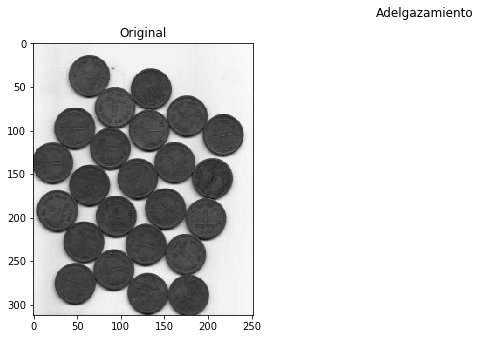

In [76]:
# -------------------------------------------------------------------------
# Copyright C 2015 Gefu Tang
# tanggefu@gmail.com
#
# License Agreement: To acknowledge the use of the code please cite the
#                    following papers:
#
# [1] A. Tahmasbi, F. Saki, S. B. Shokouhi,
#     Classification of Benign and Malignant Masses Based on Zernike Moments,
#     Comput. Biol. Med., vol. 41, no. 8, pp. 726-735, 2011.
#
# [2] F. Saki, A. Tahmasbi, H. Soltanian-Zadeh, S. B. Shokouhi,
#     Fast opposite weight learning rules with application in breast cancer
#     diagnosis, Comput. Biol. Med., vol. 43, no. 1, pp. 32-41, 2013.
# -------------------------------------------------------------------------

from math import factorial


# -------------------------------------------------------------------------
# Function to compute Zernike Polynomials:
#
# rad = radialpoly(r,n,m)
# where
#   r = radius
#   n = the order of Zernike polynomial
#   m = the repetition of Zernike moment
# -------------------------------------------------------------------------
def radialpoly(r, n, m):
    rad = np.zeros(r.shape, r.dtype)
    P = (n - abs(m)) / 2
    Q = (n + abs(m)) / 2
    for s in xrange(int(P + 1)):
        c = (-1) ** s * factorial(n - s)
        c /= factorial(s) * factorial(Q - s) * factorial(P - s)
        rad += c * r ** (n - 2 * s)
    return rad


# -------------------------------------------------------------------------
# Function to find the Zernike moments for an N x N binary ROI
#
# Z, A, Phi = Zernikmoment(src, n, m)
# where
#   src = input image
#   n = The order of Zernike moment (scalar)
#   m = The repetition number of Zernike moment (scalar)
# and
#   Z = Complex Zernike moment
#   A = Amplitude of the moment
#   Phi = phase (angle) of the mement (in degrees)
#
# Example:
#   1- calculate the Zernike moment (n,m) for an oval shape,
#   2- rotate the oval shape around its centeroid,
#   3- calculate the Zernike moment (n,m) again,
#   4- the amplitude of the moment (A) should be the same for both images
#   5- the phase (Phi) should be equal to the angle of rotation
# -------------------------------------------------------------------------
def Zernikemoment(src, n, m):
    if src.dtype != np.float32:
        src = np.where(src > 0, 0, 1).astype(np.float32)
    if len(src.shape) == 3:
        print 'the input image src should be in gray'
        return

    H, W = src.shape
    if H > W:
        src = src[int((H - W) / 2): int((H + W) / 2), :]
    elif H < W:
        src = src[:, int((W - H) / 2): int((H + W) / 2)]

    N = src.shape[0]
    if N % 2:
        src = src[:-1, :-1]
        N -= 1
    x = range(N)
    y = x
    X, Y = np.meshgrid(x, y)
    R = np.sqrt((2 * X - N + 1) ** 2 + (2 * Y - N + 1) ** 2) / N
    Theta = np.arctan2(N - 1 - 2 * Y, 2 * X - N + 1)
    R = np.where(R <= 1, 1, 0) * R

    # get the radial polynomial
    Rad = radialpoly(R, n, m)
    Product = src * Rad * np.exp(-1j * m * Theta)
    # calculate the moments
    Z = Product.sum()

    # count the number of pixels inside the unit circle
    cnt = np.count_nonzero(R) + 1
    # normalize the amplitude of moments
    Z = (n + 1) * Z / cnt
    # calculate the amplitude of the moment
    A = abs(Z)
    # calculate the phase of the mement (in degrees)
    Phi = np.angle(Z) * 180 / np.pi

    return Z, A, Phi


img = cv2.imread('w.jpg',0)

ret, thresh=cv2.threshold(img,127,255,0)
m = 2
for i in range(8):
    Z, A, Phi = Zernikemoment(thresh, i, i)    
    print "A"+str(i)+str(i)+": ",Z, A, Phi

plt.figure(2,figsize=(15,5))
plt.suptitle("Adelgazamiento")
plt.subplot(131), plt.imshow(img, cmap=plt.cm.gray), plt.title('Original')
plt.show()